In [28]:
library(tidyverse)
library(tidymodels)
set.seed(1)

Building a Model to Predict the Quality of Red Wine 

Trushaan Bundhoo, Jennifer Chu, Mantra Patel, Maira Zaidi

**Introduction**

Winemaking is a large global industry, with over 330 billion USD worth of wine sold in 2020. Cheap wine is around 15 USD / bottle, with more expensive ones fetching 500 USD+. Wine price is dictated partly by its quality, which is linked to factors like sugar content, acidity, alcohol content, and more. Since these dictate the flavor of red wine, we would like to ask: can citric acid levels, alcohol content, and sugar be used to predict the quality of wine?

In [29]:
red<- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") 
red

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5
79,0.6,0.06,16,0.069,15,59,0.9964,33,0.46,94,5
73,0.65,0,12,0.065,15,21,0.9946,339,0.47,10,7
78,0.58,0.02,2,0.073,9,18,0.9968,336,0.57,95,7


**Preliminatory Data Analysis**

For this model, we will be focusing on how citric acid, residual sugar, and alcohol content affect the rating of red wine. Below, we will select these variables and create our training and testing sets, using a 75/25 split, and then clean up the data by selecting our chosen variables.


In [30]:
red_data <- red |>
            mutate(quality = as.factor(quality))
colnames(red_data) <- make.names(colnames(red_data))



red_split<-initial_split(red_data, prop=0.75, strata=quality)
red_train<-training(red_split) |> mutate(chlorides =as.numeric(chlorides)) |> mutate(sulphates=as.numeric(sulphates)) |> mutate(volatile.acidity=as.numeric(volatile.acidity)) |> 
mutate(density=as.numeric(density))

red_test<-testing(red_split) |> mutate(chlorides =as.numeric(chlorides)) |> mutate(sulphates=as.numeric(sulphates)) |> mutate(volatile.acidity=as.numeric(volatile.acidity)) |> 
mutate(density=as.numeric(density))


red_train_set<-red_train
red_test_set<-red_test 
red_train




fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.700,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.880,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.760,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
74,0.700,0,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.660,0,18,0.075,13,40,0.9978,351,0.56,94,5
79,0.600,0.06,16,0.069,15,59,0.9964,33,0.46,94,5
75,0.500,0.36,61,0.071,17,102,0.9978,335,0.80,105,5
67,0.580,0.08,18,0.097,15,65,0.9959,328,0.54,92,5
78,0.610,0.29,16,0.114,9,29,0.9974,326,1.56,91,5


In [31]:
red_data2 <- red_data |> mutate(citric.acid=as.numeric(citric.acid)) |>mutate(volatile.acidity=as.numeric(volatile.acidity)) |>
mutate(chlorides=as.numeric(chlorides)) |>mutate(density=as.numeric(density)) |>mutate(sulphates=as.numeric(sulphates)) |> mutate(quality=as.numeric(quality))
res <- cor(red_data2)
round(res, 2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00,-0.13,0.38,0.08,0.08,-0.05,NA,0.37,-0.04,0.15,0.00,0.07
volatile.acidity,-0.13,1.00,-0.55,0.02,0.06,-0.05,NA,0.02,0.01,-0.26,0.06,-0.39
citric.acid,0.38,-0.55,1.00,0.10,0.20,0.02,NA,0.36,-0.09,0.31,-0.02,0.23
residual.sugar,0.08,0.02,0.10,1.00,0.01,0.06,NA,0.12,0.02,-0.02,0.01,0.01
chlorides,0.08,0.06,0.20,0.01,1.00,-0.01,NA,0.20,-0.07,0.37,0.00,-0.13
free.sulfur.dioxide,-0.05,-0.05,0.02,0.06,-0.01,1.00,NA,-0.09,-0.01,0.00,0.00,0.02
total.sulfur.dioxide,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA
density,0.37,0.02,0.36,0.12,0.20,-0.09,NA,1.00,-0.04,0.15,0.01,-0.17
pH,-0.04,0.01,-0.09,0.02,-0.07,-0.01,NA,-0.04,1.00,-0.04,0.02,0.01
sulphates,0.15,-0.26,0.31,-0.02,0.37,0.00,NA,0.15,-0.04,1.00,0.00,0.25


With our training and testing sets made, we will now generate some tables to help us understand the data a bit more. Below we generate the "counts" table to find the number of wines for each given rating, and the "counts_sugar" table to find wines with a given rating and sugar level.

In [32]:
counts<-red_train_set |>
        group_by(quality) |>
        summarize(n=n())
counts

counts_sugar<-red_train_set |>
        group_by(scaled_residual_sugar, quality) |>
        summarize(n=n())
counts_sugar

quality,n
<fct>,<int>
3,7
4,44
5,507
6,473
7,149
8,17


ERROR: [1m[33mError[39m in [1m[1m`group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `scaled_residual_sugar` is not found.


The two tables generated from our training set provide insight about the wrangled data. The "counts" table provides the number of red wines that were given a particular rating, with most being rated a 5/8. The "counts_sugar" table is longer and shows the ratings given based on their residual sugar content. We could potentially do the same with citric acid or alcohol content, but the wider value range would lengthen the table even more. Instead, plots help us better visualize any relationships our 3 variables and the quality rating. We will now create a histogram, plotting quantity against sugar content and coloring the bars by quality. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


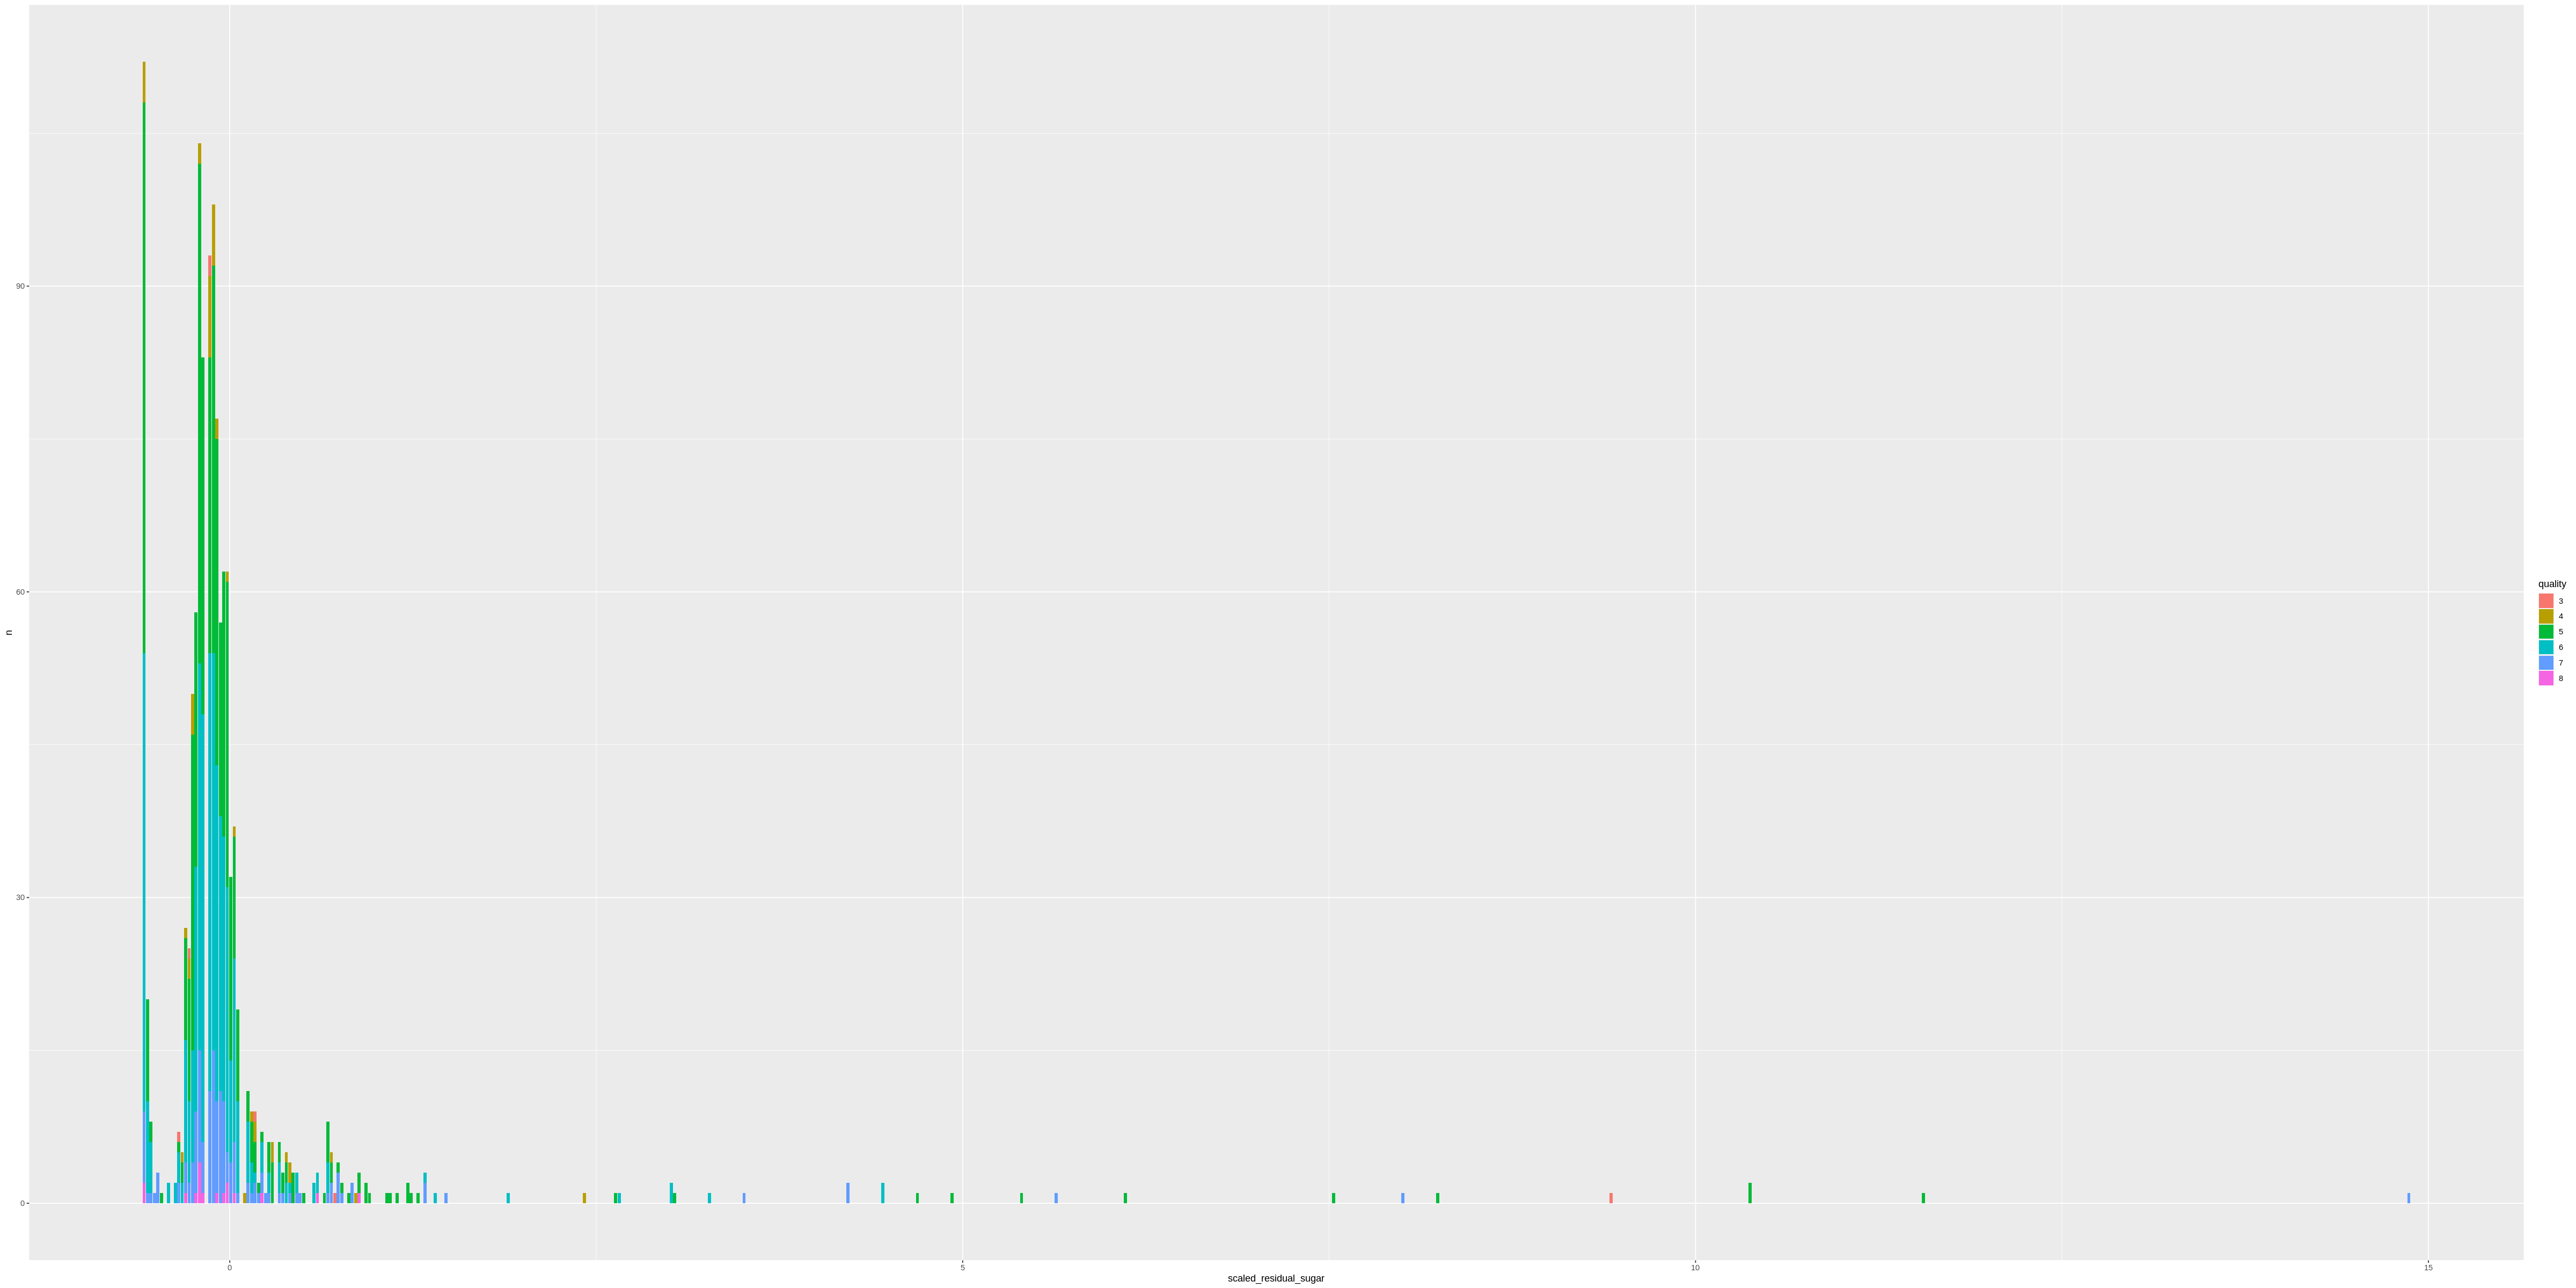

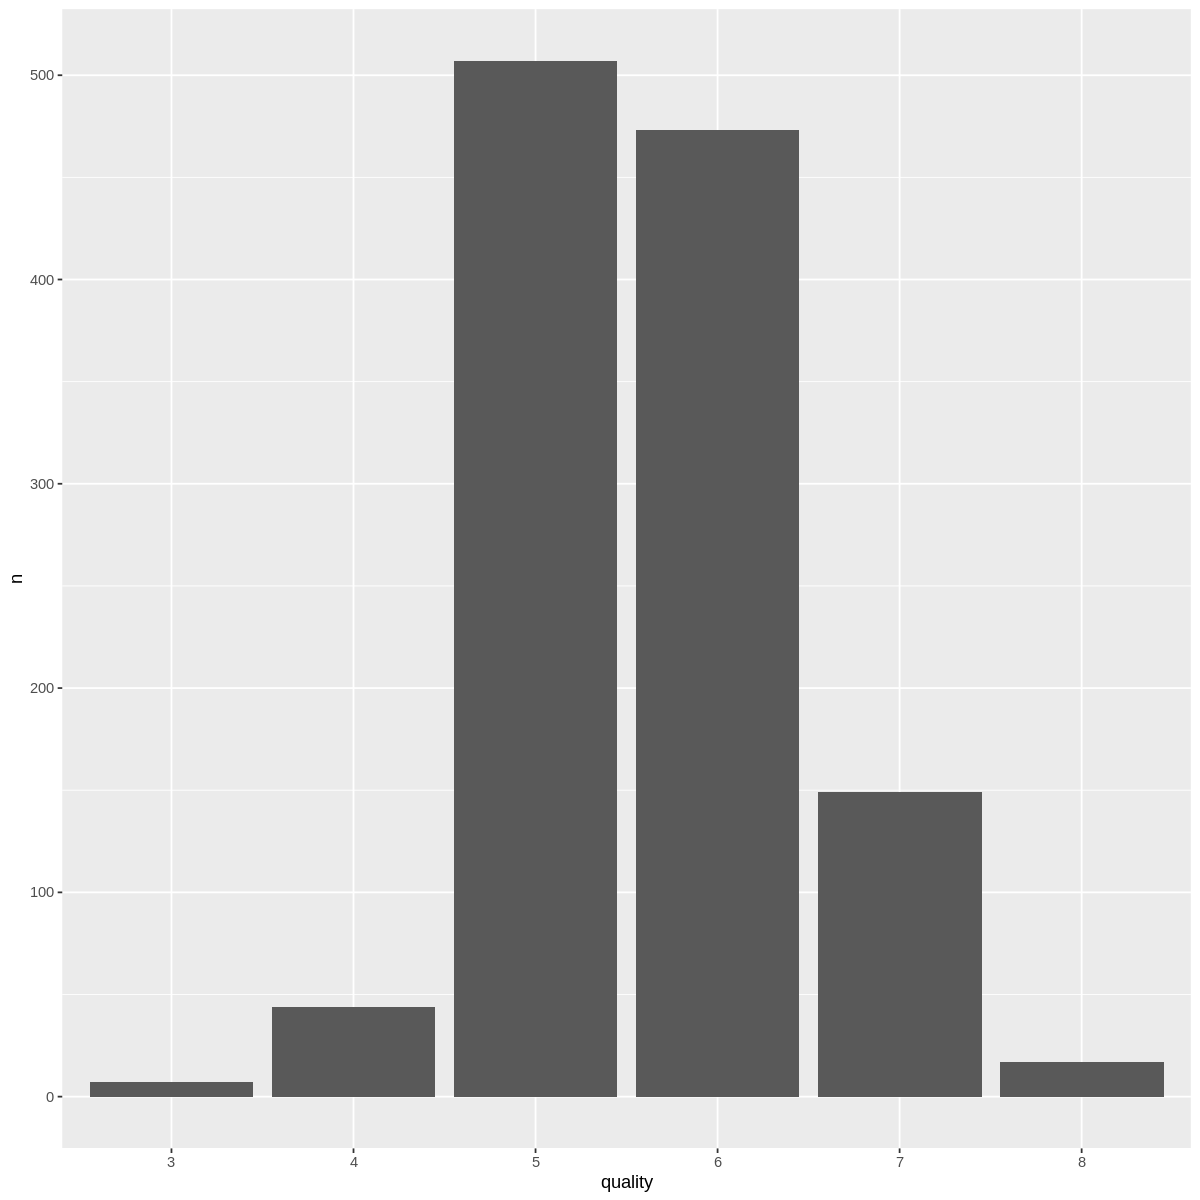

In [33]:
options(repr.plot.width = 40, repr.plot.height = 20)
 sugar_plot <- ggplot(counts_sugar, aes(x=scaled_residual_sugar, y =n, fill=quality)) + geom_histogram(stat="identity")
sugar_plot
options(repr.plot.width = 10, repr.plot.height = 10)
 count_plot <- ggplot(counts, aes(x=quality, y =n)) + geom_histogram(stat="identity")
count_plot

The above plots reveal many things to us, namely that the majority of wines have a quality rating of 5 or 6 out of 8, and that a majority of wines have a sugar content close to one another, regardless of the rating. This shows that sugar content may not be a good predictor of quality, as there is no obvious correlation between sugar content and quality. 




**Methods**

Given the importance of acidity, sugar, and alcohol in winemaking, we will use values from these columns to build a predictive model that determines the quality rating for a given red wine. We will K-nn classification model, using nearest neighbors for citric acid, alcohol, and residual sugar to predict the wine quality. Cross validation on our model will be performed 8 times, and the number of neighbors in the model will be determined by setting "neighbors=tune()" for 10 values of K. The K value with the highest testing accuracy will be used to build the final K-nn classification model, which we will then apply to the testing data to predict quality ratings.


Expected Outcomes

Based on what we saw from the exploratory tables and visualizations, we hope that the model we build will be able to accurately predict wine quality. Human taste is ultimately the key aspect of determining whether a wine is high quality, but if quality is predicted by chemical properties alone, it could lead to breakthroughs in the winemaking industry. If successful, such a predictive model can have large implications in the industry, as the information could be used by winemakers to understand how they can produce higher quality wine, and rake in more profit. This could lead to the integration of modern chemical techniques and engineering with winemaking to revolutionize a craft that has been around for thousands of years.


Analysis 

We will now begin the construction of our predictive model. We will begine by creating a recipe, stating our predictors for use in the algorithm. To maximize accuracy of our classifier, we will be performing a 5-fold cross validation, and tuning our model to find the K value with the highest accuracy. Below, we build our model, selecting quality as the what to predict, selecting all other variables as predictors, then scaling and centering them. 8 fold cross v

! Fold05: internal:
  No observations were detected in `truth` for level(s): '3', '8'
  Computation will proceed by ignoring those levels.

! Fold06: internal:
  No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.

! Fold07: internal:
  No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.

! Fold09: internal:
  No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5530768,10,0.01341140,Preprocessor1_Model01
2,accuracy,multiclass,0.5539101,10,0.01403445,Preprocessor1_Model02
3,accuracy,multiclass,0.5229772,10,0.01054367,Preprocessor1_Model03
4,accuracy,multiclass,0.5129346,10,0.01222429,Preprocessor1_Model04
5,accuracy,multiclass,0.5154209,10,0.01308634,Preprocessor1_Model05
6,accuracy,multiclass,0.5195801,10,0.01592575,Preprocessor1_Model06
7,accuracy,multiclass,0.5187117,10,0.01343116,Preprocessor1_Model07
8,accuracy,multiclass,0.5137743,10,0.01443519,Preprocessor1_Model08
9,accuracy,multiclass,0.5171851,10,0.01325629,Preprocessor1_Model09


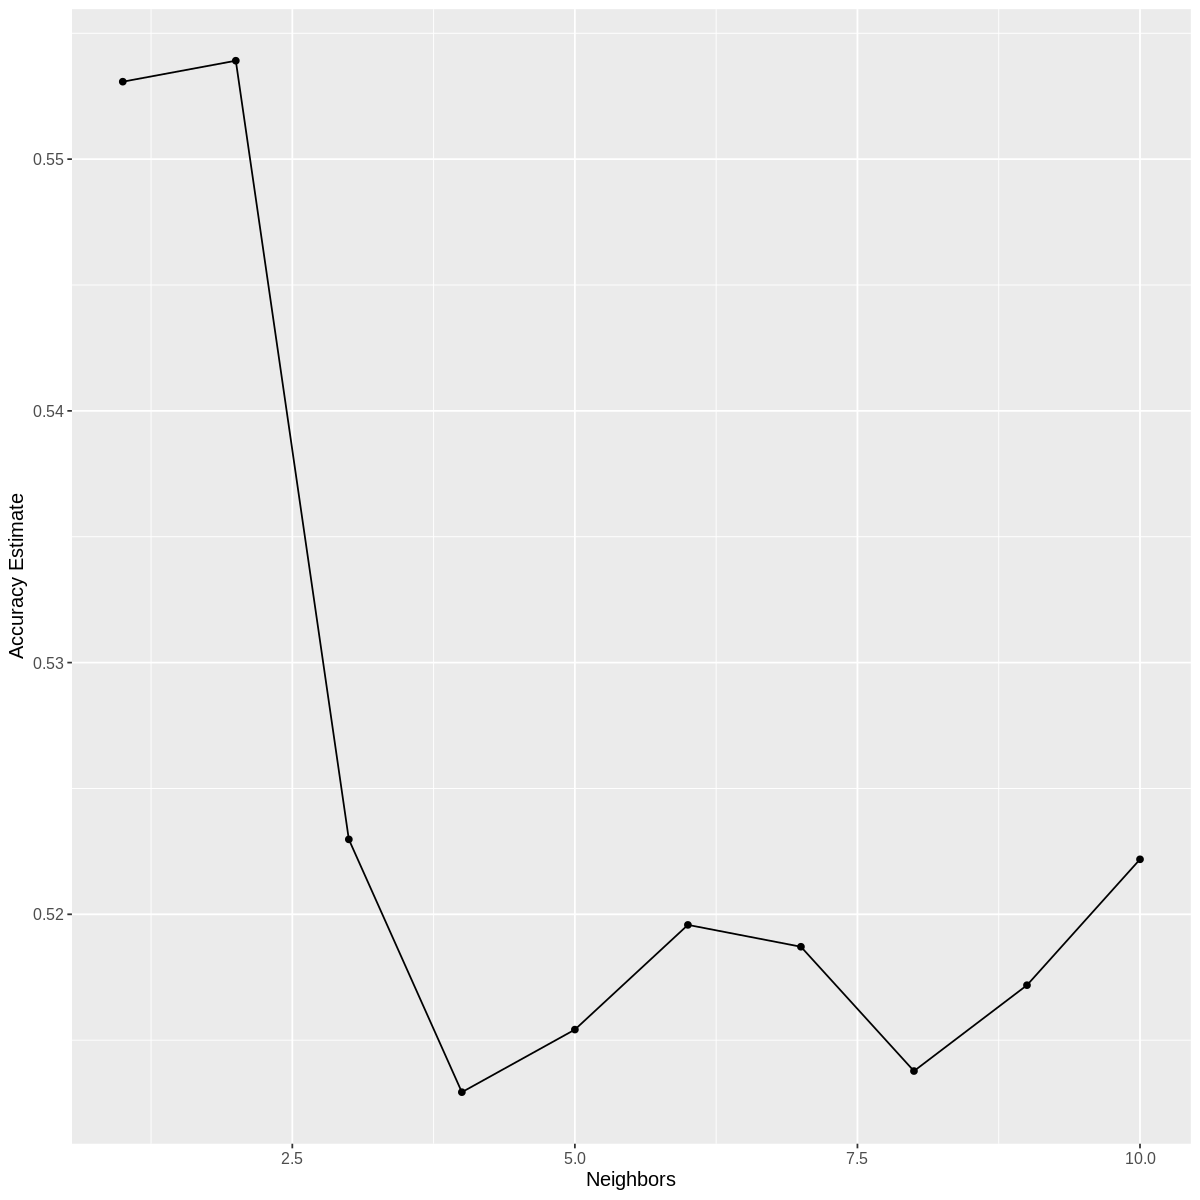

In [37]:
red_recipe<-recipe(quality~volatile.acidity+sulphates+density, data=red_train) |> step_scale(all_predictors()) |> step_center(all_predictors())
red_vfold<-vfold_cv(red_train, v=10, strata=quality)

knn_spec<-nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
                             set_engine("kknn") |>
                             set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))
knn_results <- workflow() |>
  add_recipe(red_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = red_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k


In [38]:
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 2) |>
                             set_engine("kknn") |>
                             set_mode("classification")

knn_fit <- workflow() |>
       add_recipe(red_recipe) |>
       add_model(knn_spec2) |>
       fit(data = red_train)
prediction <- predict(knn_fit, red_test) |> bind_cols(red_test)
prediction
prediction_accuracy <- prediction |>
       metrics(truth = quality, estimate = .pred_class)       
prediction_accuracy


.pred_class,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,75,0.500,0.36,61,0.071,17,102,0.9978,335,0.80,105,5
6,56,0.615,0,16,0.089,16,59,0.9943,358,0.52,99,5
5,89,0.620,0.18,38,0.176,52,145,0.9986,316,0.88,92,5
6,81,0.560,0.28,17,0.368,16,56,0.9968,311,1.28,93,5
6,69,0.400,0.14,24,0.085,21,40,0.9968,343,0.63,97,6
6,71,0.710,0,19,0.080,14,35,0.9972,347,0.55,94,5
5,67,0.675,0.07,24,0.089,17,82,0.9958,335,0.54,101,5
5,83,0.655,0.12,23,0.083,15,113,0.9966,317,0.66,98,5
5,73,0.450,0.36,59,0.074,12,87,0.9978,333,0.83,105,5


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6194030
kap,multiclass,0.4051184


In [ ]:
knn_spec2 <- nearest_neighbor(weight_func = "triangular", 
                             neighbors = 6) |>
                             set_engine("kknn") |>
                             set_mode("classification")

knn_fit <- workflow() |>
       add_recipe(red_recipe) |>
       add_model(knn_spec2) |>
       fit(data = red_train)
prediction <- predict(knn_fit, red_test) |> bind_cols(red_test)
prediction_accuracy <- prediction |>
       metrics(truth = quality, estimate = .pred_class)       
prediction_accuracy